In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from pathlib import Path 

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
database_path = Path('/Users/lauren-ashleyrutland/Downloads/Starter_Code 18/Resources/hawaii.sqlite')

engine = create_engine(f"sqlite:///{database_path}")

In [5]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=False)

In [6]:
# View all of the classes that automap found

Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement


In [8]:
# Create our session (link) from Python to the DB
Session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [95]:
# Find the most recent date in the data set.

recent_date = Session.query(func.max(Measurement.date)).scalar()

recent_date

'2017-08-23'

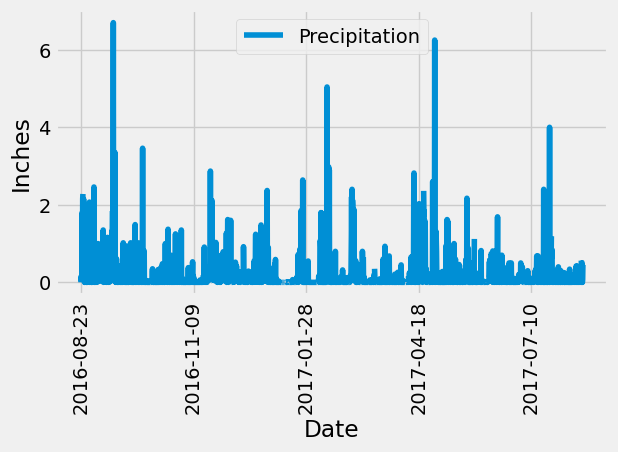

In [103]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
recent_datapoint = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
oneyear = recent_datapoint - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = Session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= oneyear).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_data = pd.DataFrame(results, columns=["date", "precipitation"])

# Set the index to the date column
precip_data.set_index("date", inplace=True)

#plot 

precip_data.plot()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["Precipitation"], loc="upper center")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [105]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_summary = precip_data.describe()

precipitation_summary

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [108]:
# Design a query to calculate the total number of stations in the dataset
total_stations = Session.query(func.count(Station.station)).scalar()
total_stations

9

In [112]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

most_active_stations = Session.query(Measurement.station, func.count(Measurement.station))\
                                .group_by(Measurement.station)\
                                .order_by(func.count(Measurement.station).desc())\
                                .all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [123]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

temperature = Session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
                     .filter(Measurement.station == "USC00519281")\
                     .all()

print(temperature)

[(54.0, 85.0, 71.66378066378067)]


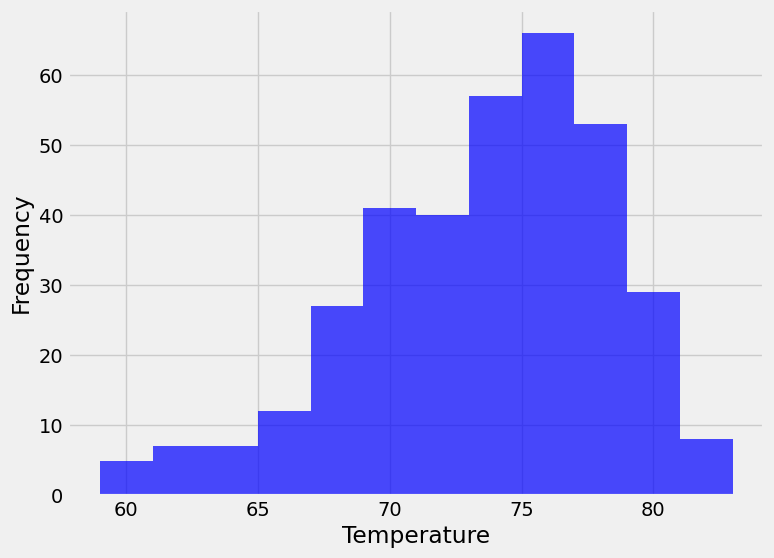

In [140]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Identify the most active station ID
most_active_station_id = most_active_stations[0][0]

# Calculate the date one year ago from the last date in the dataset
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the temperature observations for the last 12 months for the identified station
temperature_results = Session.query(Measurement.tobs)\
                            .filter(Measurement.station == most_active_station_id)\
                            .filter(Measurement.date >= one_year_ago)\
                            .all()

# Save the query results as a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_results, columns=['Temperature'])

# Plot the results as a histogram
plt.figure(figsize=(8, 6))
plt.hist(temperature_df['Temperature'], bins=12, alpha=0.7, color='blue')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [138]:
# Close Session
Session.close()